# Project - Introduction to Python Programming

The feedback for your project will be written in the Markdown cell under this one, containing "YOUR ANSWER HERE" -- please *do not delete it*! Create new cells *below the rules* to write your project.

# FEEDBACK

---
---

# Introduction to Hierarchical Temporal Memory (HTM)
## Tutorial Sheet 1 - Sparse Distributed Representations (SDRs)
#### Tutorial goals:
1. Understand the motivation for using SDRs
2. Learn the key features of SDRs
3. Learn what an encoder is - 4 simple rules
4. Implement an encoder for stock data, and convert stock data set into SDRs

#### Motivations

One of the most interesting challenges in AI is the problem of knowledge representation. Representing everyday facts and relationships in a form that computers can work with has proven to be difficult with traditional computer science methods. The  basic problem is that our knowledge of the world  is not divided into discrete facts with well-defined relationships. Almost everything we know  has exceptions, and the relationships between concepts are too numerous and ill-defined to map onto traditional computer data structures. 

Brains do not have this problem. They represent information using a method called Sparse Distributed Representations, or SDRs. SDRs and their mathematical properties are essential for biological intelligence. Everything the brain does and every principle described in this book is based on SDRs. SDRs are the language of the brain. The flexibility and creativity of human intelligence is inseparable from this representation method. Therefore, if we want intelligent machines to be similarly flexible and creative,they need to be based on the same representation method, SDRs. 

An SDR consists of thousands of bits where at any point in time a small percentage of the bits are 1’s and the rest are 0’s. The bits in an SDR correspond to neurons in the brain, a 1 being a relatively active neuron and a 0 being a relatively inactive neuron. The most important property of SDRs is that each bit has meaning. Therefore, the set of active bits in any  particular representation encodes the set of semantic attributes of what is being represented. The  bits are not labeled (that is to say, no one assigns meanings to the bits), but rather, the semantic meanings of bits are learned. If two  SDRs have active bits in  the same locations, they share the semantic attributes represented by those bits. By determining the overlap between two SDRs(the equivalent bits that are 1 in both SDRs) we can immediately see how two representations are semantically similar and how they are semantically different. Because of this semantic overlap property, systems based on SDRs automatically generalize based on semantic similarity.[[0]][Hawkins, J. et al. 2016. Biological and Machine Intelligence.]

[Hawkins, J. et al. 2016. Biological and Machine Intelligence.]: https://numenta.com/assets/pdf/biological-and-machine-intelligence/BaMI-SDR.pdf

#### Key features of SDRs

1. Only a small number of neurons (bits) are firing (=1) at any point in time
2. There are a very large number of neurons (bits)
3. Every bit represents something different and has meaning – semantically similar data will have large overlap in their SDR
4. Information is distributed and no single neuron (bit) is critical
5. SDRs enable extremely fast computation (All computations run linearly with the number of ON bits)

#### Some further features to ponder...
Think about why SDRs might be robust to noise. Why might it not matter if an SDR had a few bits missing/in a random position. Could you still tell what it was supposed to match? If it was matched wrongly, what would it likely be matched to?

If you were given a random sample of the on bits from an sdr, could you tell which sdr this was from a list of many?

#### What is an Encoder?

An encoder simply transforms some form of data into SDRs.

There are a few rules to follow when writing an encoder:

1. Semantically similar input data should result in SDRs with overlapping active bits.
2. The same input should always produce the same SDR as output.
3. The output should have the same dimensionality (total number of bits) for all inputs.
4. The  output should have similar sparsity for all inputs and have enough one-bits to handle noise and subsampling.[[2]][Hawkins, J. et al. 2016. Biological and Machine Intelligence.]

[Hawkins, J. et al. 2016. Biological and Machine Intelligence.]: https://numenta.com/assets/pdf/biological-and-machine-intelligence/BaMI-Encoders.pdf

### Implementing an encoder

Now it's time to implement an encoder for stock data

In [1]:
import pandas as pd
import numpy as np
import datetime

#### Download the data, and read it into a panda dataframe

The data I worked with I found here: https://www.histdata.com/download-free-forex-historical-data/?/excel/1-minute-bar-quotes/audcad/2007

If you prefer to work on some other sequential data: feel free!

The following code should be edited to include the file path where you decide to store the data in csv format.

In [2]:
# Read our csv into a panda dataframe
data = pd.read_csv("YOUR/FILE/PATH.csv")
# Give columns names
data = data.rename(	dict(zip(list(data.columns.values),
            ['datetime','a','b','c','d','e'])),
            errors="raise", 
            axis=1)
# Convert datetime column to proper datetime object Series
data['datetime'] = pd.to_datetime(data['datetime'])
# Print the head as a quick check
print(data.head())

FileNotFoundError: [Errno 2] File b'YOUR/FILE/PATH.csv' does not exist: b'YOUR/FILE/PATH.csv'

#### Encoding functions

In [88]:
def datetime_to_sdr(date_time, minimum, maximum):
    """
    Takes datetime.datetime object and returns sdr.
    
    This function takes a datetime.datetime object, and returns a sdr consisting of 4 parts:
    1. a representation of the day of the week
    2. a representation of the time of year/season
    3. a representation of the year
    4. a representation of the time of day
    It does this given a upper and lower bound on the dates that can be expressed
    
    Parameters
    ----------
    date_time : datetime.datetime
        The datetime.datetime to be express
    minimum : datetime.datetime
        The lower bound for datetimes that can be expressed
    maximum : datetime.datetime
        The upper bound for datetimes that can be expressed
    
    Returns
    -------
    list
        A list sdr for the datetime given - expressed with 0s and 1s.
    """
    
    # Define the number of active bits for each part of representation
    # We hold this constant so that no part of the sdr is weighted over
    # any other.
    active_n = 10

    day_sdr = datetime_to_day_sdr(date_time, active_n)
    season_sdr = datetime_to_season_sdr(date_time, active_n)
    year_sdr = datetime_to_year_sdr(date_time, minimum, maximum, active_n)
    time_sdr = datetime_to_time_sdr(date_time, active_n)

    date_time_sdr = day_sdr+season_sdr+year_sdr+time_sdr

    return date_time_sdr

def datetime_to_day_sdr(date_time, active_n):
    """
    Takes datetime.datetime object and returns sdr representing the day of the week.

    Parameters
    ----------
    date_time : datetime.datetime
        The datetime.datetime to be express
    active_n : int
        The number of active bits that the representation should contain.
    
    Returns
    -------
    list
        A list sdr for the day of the week - expressed with 0s and 1s.
    """
    day = date_time.weekday()
    day_n = 7*active_n
    day_sdr = [0]*(day*active_n) + [1]*active_n
    day_sdr = day_sdr + [0]*(day_n-len(day_sdr))
    return day_sdr

def datetime_to_season_sdr(date_time, active_n):
    """
    Takes datetime.datetime object and returns sdr representing the time of year/season.

    Takes datetime.datetime object and returns sdr representing the time of year/season with resolution
    to the day.

    Parameters
    ----------
    date_time : datetime.datetime
        The datetime.datetime to be express
    active_n : int
        The number of active bits that the representation should contain.
    
    Returns
    -------
    list
        A list sdr for the time of year/season - expressed with 0s and 1s.
    """
    season = date_time.timetuple().tm_yday-1
    season_n = 366+(active_n-1)
    season_sdr = [0]*season + [1]*active_n+[0]*(season_n-season-active_n)
    return season_sdr

def datetime_to_year_sdr(date_time, minimum, maximum, active_n):
    """
    Takes datetime.datetime object and returns sdr.
    
    This function takes a datetime.datetime object, and returns a sdr for the year.
    It does this given a upper and lower bound on the dates that can be expressed.
    
    Parameters
    ----------
    date_time : datetime.datetime
        The datetime.datetime to be express
    minimum : datetime.datetime
        The lower bound for datetimes that can be expressed
    maximum : datetime.datetime
        The upper bound for datetimes that can be expressed
    active_n : int
        The number of active bits that the representation should contain.
    
    Returns
    -------
    list
        A list sdr for the year - expressed with 0s and 1s.
    """
    year_n = (maximum.year-minimum.year+1)+(active_n-1)
    year = date_time.year-minimum.year
    year_sdr = [0]*year + [1]*active_n+[0]*(year_n-year-active_n)
    return year_sdr

def datetime_to_time_sdr(date_time,active_n):
    """
    Takes datetime.datetime object and returns sdr representing the time of day.

    Takes datetime.datetime object and returns sdr representing the time of day with resolution 
    to the second.

    Parameters
    ----------
    date_time : datetime.datetime
        The datetime.datetime to be express
    active_n : int
        The number of active bits that the representation should contain.
    
    Returns
    -------
    list
        A list sdr for the time of day - expressed with 0s and 1s.
    """
    time_n = 24*60*60+(active_n-1)
    time = date_time.time()
    seconds_since_midnight = int((date_time - 
                                  datetime.datetime(date_time.year, date_time.month, date_time.day)).total_seconds())
    time_sdr = [0]*seconds_since_midnight + [1]*active_n + [0]*(time_n-seconds_since_midnight-active_n)
    return time_sdr	

def stock_price_to_sdr(price, minimum=0., maximum=100., resolution=0.0001):
    """
    Takes stock_price and returns a suitable sdr.

    Takes a float for the stock price. It then represents this this price as an sdr with capacity defined
    by the minimum and maximum parameters and with a resolution given by the resolution parameter.

    Parameters
    ----------
    price : float
        The value to be expressed
    minimum : float
        The smallest value that can be expressed
    maximum : float
        The largest value that can be expressed
    
    Returns
    -------
    list
        A list sdr for the stock price - expressed with 0s and 1s.
    """
    
    assert price>=minimum,"Price is smaller than minimum"
    assert price<=maximum,"Price is larger than maximum"

    price_i = x_to_res_i(price, resolution)-x_to_res_i(minimum, resolution)
    n_sdr = int(np.ceil((maximum-minimum)/resolution))
    # Portion of active bits should be ~5%
    active = int(np.ceil(n_sdr*.05))
    # Bits added to beginning and end to avoid cyclic definition
    n_sdr+=int(np.ceil(active/2)*2)

    sdr = [0]*price_i+[1]*active
    #print("len(sdr): ", len(sdr))
    #print("n_sdr: ", n_sdr)
    sdr = sdr + [0]*(n_sdr-len(sdr))
    assert(len(sdr)==n_sdr)
    return sdr
    
def stock_price_to_sdr_test():
    # Test that sdr is always same size
    return False

def x_to_res_i(x,res):
    """
    Takes a float value x and returns its nearest multiple of the float value res, divided by res.

    Parameters
    ----------
    x : float
        The value to be expressed
    res : float
        The divisor
    
    Returns
    -------
    int
        The number of times that res fits into the nearest multiple of res to x.
    """
    r=x%res
    if r>res/2:
        m=(x-r)/res+1
    else:
        m=(x-r)/res
    return int(m)

def compress_sdr(sdr):
    """
    Expresses an sdr by a list of indices of the active bits.

    Parameters
    ----------
    sdr : list
        An sdr expressed by 0s and 1s
    
    Returns
    -------
    list
        A list of indices of the active bits in the input sdr.
    """
    return [i for i,n in enumerate(sdr) if n==1]

def set_sdr(sdr):
    """
    Expresses an sdr by a set of indices of the active bits.

    Parameters
    ----------
    sdr : list
        An sdr expressed by 0s and 1s
    
    Returns
    -------
    set
        A set of indices of the active bits in the input sdr.
    """
    return set(compress_sdr(sdr))

#### Converting our full dataset to sdr representations

Note that this should be edited to inlude your output file path of choice.

In [77]:
# Get the datetime Series, and find its range
date_time = data['datetime']
minimum_date = date_time.min()
maximum_date = date_time.max()

# Get the first of the price columns (Stock data has multiple dimensions for each time step.
# We ignore there specific meanings for these purposes
prices = data['a']

# We map the date_time and price entries to sdrs
# This may take a while! Go get yourself a coffee.
date_time = date_time.map(lambda x: set_sdr(datetime_to_sdr(x, minimum_date, maximum_date)))
prices = prices.map(lambda x: set_sdr(stock_price_to_sdr(x, minimum=prices.min(), maximum=prices.max())))

# Write the series to a new dataframe, and stick it in a csv file somewhere for later
sdr_data = pd.DataFrame({'datetime':date_time, 'price':prices})
sdr_data.to_csv("YOUR/FILE/PATH/sdr_data.csv")

# Print the head as a quick check
print(sdr_data.head())

NameError: name 'data' is not defined

### Exercises:
1. Rewrite at least one of the encoding functions to return directly the set representation given by set_sdr without going via the 0s and 1s list representation. Why might this be advantages?
2. Write a function that, given a collection of n sdrs, and an sdr that is equal to one of those n, can match the sdr given to one in the set. Use subsampling, and test the how fast and reliable you can make it. Add noise and see if you can still achieve good results.
3. Take n sdrs. Take r<<n randomly chosen sdrs from these n and take their union. Can you tell which sdrs went into the union?

## Tutorial Sheet 2 - Spatial Pooling

Last workshop we used the following diagram to visualise the process of generating SDRs.

Raw Data ----Encoder---> Hard Coded SDR ----Spatial Pooler---> Learned/Final SDR


This sheet will be all about the spatial pooling algorithm. This is where the learning starts.

### What is the spatial pooler (SP) anyway?
The SP models how neurons learn feedforward connections and form efficient representations of the input.
#### Why bother with it?
Motivation: 
1. The input from an encoder may not have entirely fixed sparsity. 
2. The input may be very large, it may have a great number of dimensions/features. 
3. Can we get EVEN MORE robust to noise? 
4. Do we want to generalise to things the semantic similarity that we've hard coded, or to things that are similar in that sense, but also to what we've actually seen that is similar?
5. We want our system to be adaptive to changing input statistics.
6. Fault tolerant - e.g. lesions. May not be relevant in our current hardware, but think of hardware implementations of this stuff.

#### So what then is the difference between the "hard coded sdr" and the "learned/pooled sdr"?
The learned ones manage all the things mentioned above!

#### How is this achieved?
1. Fixed number of winning columns
2. Combinatorially able to represent very many things.
3. Through learning we learn to recognise things seen previously in a strong way.
4. Learning which causes more overlap with things seen previously
5. Online learning means that the columns can be repurposed.
6. Similar to 5

### Essential features of the SP algorithm
In the image displayed below, imagine that the shaded areas for "local inhibition" in fact covers the whole space, as does the "potential connections" area. This describes the case of "global inhibition" and no use of "topology". This simplifies things for now. We will come back to these features in a later tutorial.

Also ignore graph D as this describes a feature called "boosting". Again, this has been left until a future workshop to be discussed and implemented.

![SP diagram](https://www.frontiersin.org/files/Articles/272195/fncom-11-00111-HTML/image_m/fncom-11-00111-g001.jpg)

In [78]:
# Some helper functions
import random

def distinct_rand_ints_in_range(minimum,maximum,n):
    N = set()
    while len(N) < n:
        N.add(random.randint(minimum,maximum))
    return N



In [120]:
# From here we assume that sdrs are implemented as sets of indices

class Column:
    def __init__(self, 
                 cell_n, 
                 input_d, 
                 potential_percent, 
                 perm_threshold, 
                 initial_perm_range):
        
        # Initialise random intial feedforward connections
        feedforward = set()
        potential_connected_inputs_inds = distinct_rand_ints_in_range(0,
                                                                      input_d-1, 
                                                                      np.floor(input_d*potential_percent))    
        for potential_index in potential_connected_inputs_inds:
            permenance = random.uniform(perm_threshold-initial_perm_range/2, 
                                        perm_threshold+initial_perm_range/2)
            feedforward.add(Synapse(permenance, potential_index, self, perm_threshold))
        self.feedforward=feedforward
        
class Synapse:
    def __init__(self, 
                 permenance, 
                 pre_syn_index, 
                 post_syn_cell, 
                 synaptic_permenance_connected):
        
        self.pre_syn_index=pre_syn_index
        self.post_syn_cell=post_syn_cell
        
        self.permenance=permenance
        
        self.update_connected(synaptic_permenance_connected)
        
    def perm_increment(self, synaptic_permenance_inc, synaptic_permenance_connected):
        self.permenance = min(1.0, self.permenance+synaptic_permenance_inc)
        self.update_connected(synaptic_permenance_connected)
        
    def perm_decrement(self, synaptic_permenance_dec, synaptic_permenance_connected):
        self.permenance = max(0.0, self.permenance-synaptic_permenance_dec)
        self.update_connected(synaptic_permenance_connected)
        
    def update_connected(self, synaptic_permenance_connected):
        self.connected = self.permenance>=synaptic_permenance_connected
        
class Pooler:
    def __init__(self, 
                 input_d, 
                 n_columns=2048, 
                 n_active_columns=40,
                 potential_percent=0.85,
                 initial_perm_range=0.5,
                 synaptic_permenance_inc=0.05, 
                 synaptic_permenance_dec=0.008,
                 synaptic_permenance_connected=0.5):
        
        self.input_d = input_d
        self.synaptic_permenance_inc = synaptic_permenance_inc 
        self.synaptic_permenance_dec = synaptic_permenance_dec
        self.synaptic_permenance_connected = synaptic_permenance_connected
        self.columns = set([Column(input_d, 
                               potential_percent, 
                               synaptic_permenance_connected, 
                               initial_perm_range) for i in range(n_columns)])
        self.n_active_columns = n_active_columns
        

    def iterate(self, input_data, learn=True):
        
        # For each input in the sequence
        counter = 1
        for sdr_in in input_data:
            # Evaluate active columns
            active_columns = self.evaluate(sdr_in)
            
            # Update synapse permenance and connectedness
            print("Sample", counter, "/", len(input_data))
            counter += 1
            if learn:
                for c in active_columns:
                    for s in c.feedforward:
                        if s.pre_syn_index in sdr_in:
                            s.perm_increment(self.synaptic_permenance_inc, self.synaptic_permenance_connected)
                        else:
                            s.perm_decrement(self.synaptic_permenance_dec, self.synaptic_permenance_connected)

    def evaluate(self, sdr_in):
        signal = {}
        for c in self.columns:
            signal[c]=0
            for s in c.feedforward:
                if s.connected:
                    signal[c] += int(s.pre_syn_index in sdr_in)
            # TODO implement boosting here
        
        # Select the int(n_active_columns) columns with the highest signal
        active_columns = set()
        for i in range(self.n_active_columns):
            maxi = max(signal, key=signal.get)
            active_columns.add(maxi)
            del signal[maxi]
        return active_columns

#### Tests

<IPython.core.display.Javascript object>


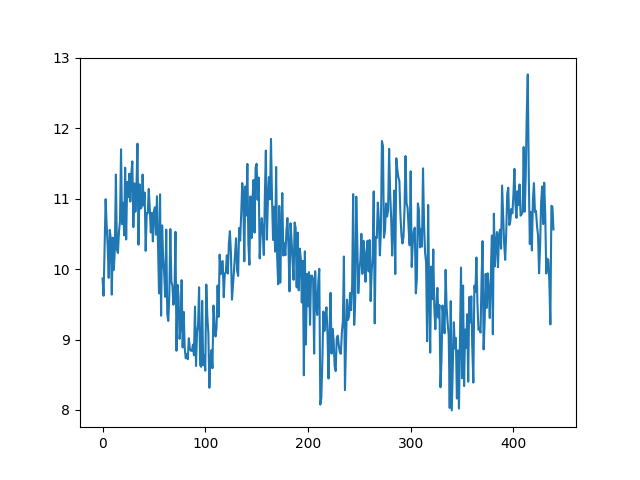

In [113]:
# Generate synthetic data
%matplotlib notebook
import random
import numpy as np
import matplotlib.pyplot as plt

f=np.sin(np.arange(0,7*np.pi,0.05))
for k in range(len(f)):
    f[k]+=10+random.gauss(0,0.5)

plt.plot(f)
plt.show()

In [115]:
# Turn into sdrs

f_sdrs = []
for i in f:
    f_sdrs.append(stock_price_to_sdr(i,7,14,0.01))

f_input_d = len(f_sdrs[0])

for k in range(len(f_sdrs)):
    f_sdrs[k] = set_sdr(f_sdrs[k])

736


<IPython.core.display.Javascript object>


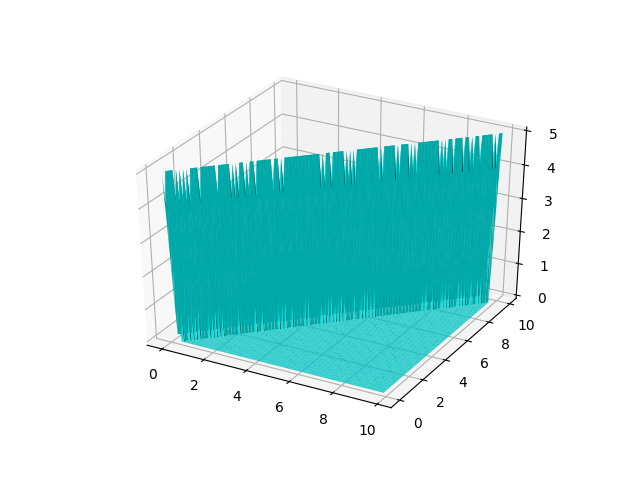

In [116]:
# Test overlap scores

def test_overlap(raw_data, sdrs):
    
    %matplotlib notebook
    from mpl_toolkits.mplot3d import axes3d
    
    x_tmp = [[i]*len(sdrs) for i in range(len(sdrs))]
    x_pos = []
    for x in x_tmp:
        x_pos=x_pos+x

    y_tmp = [list(range(len(sdrs))) for i in range(len(sdrs))]
    y_pos = []
    for y in y_tmp:
        y_pos=y_pos+y

    z_pos=[0]*(len(sdrs)**2)

    x_size, y_size = [[1]*(len(sdrs)**2)]*2

    def z_fun(x):
        return [len(sdrs[x].intersection(sdrs[i])) for i in range(len(sdrs))]

    z=[]
    for x in range(len(sdrs)):
        z = z + z_fun(x)

    z_size = z

    x_pos = [raw_data[x] for x in x_pos]
    y_pos = [raw_data[y] for y in y_pos]

    ax = plt.axes(projection="3d")
    ax.plot_trisurf(x_pos, y_pos, z_size, color='aqua')
    plt.show()

In [ ]:
test_overlap(f,f_sdrs)

In [117]:
# Test pooler learning

pooler = Pooler(f_input_d)
pooler.iterate(f_sdrs, learn=True)

Sample 1 / 440
Sample 2 / 440
Sample 3 / 440
Sample 4 / 440
Sample 5 / 440
Sample 6 / 440
Sample 7 / 440
Sample 8 / 440
Sample 9 / 440
Sample 10 / 440
Sample 11 / 440
Sample 12 / 440
Sample 13 / 440
Sample 14 / 440
Sample 15 / 440
Sample 16 / 440
Sample 17 / 440
Sample 18 / 440
Sample 19 / 440
Sample 20 / 440
Sample 21 / 440
Sample 22 / 440
Sample 23 / 440
Sample 24 / 440
Sample 25 / 440
Sample 26 / 440
Sample 27 / 440
Sample 28 / 440
Sample 29 / 440
Sample 30 / 440
Sample 31 / 440
Sample 32 / 440
Sample 33 / 440
Sample 34 / 440
Sample 35 / 440
Sample 36 / 440
Sample 37 / 440
Sample 38 / 440
Sample 39 / 440
Sample 40 / 440
Sample 41 / 440
Sample 42 / 440
Sample 43 / 440
Sample 44 / 440
Sample 45 / 440
Sample 46 / 440
Sample 47 / 440
Sample 48 / 440
Sample 49 / 440
Sample 50 / 440
Sample 51 / 440
Sample 52 / 440
Sample 53 / 440
Sample 54 / 440
Sample 55 / 440
Sample 56 / 440
Sample 57 / 440
Sample 58 / 440
Sample 59 / 440
Sample 60 / 440
Sample 61 / 440
Sample 62 / 440
Sample 63 / 440
S

In [118]:
# Test pooler evaluation
active_columns=[]
for i in f_sdrs:
    active_columns.append(pooler.evaluate(i))

<IPython.core.display.Javascript object>


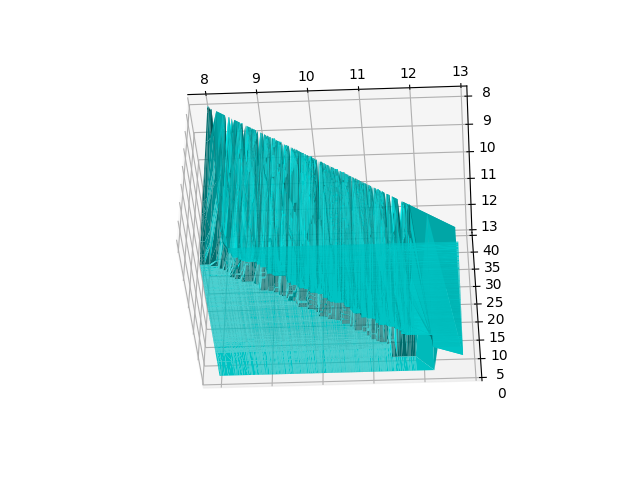

In [119]:
# Test overlap
test_overlap(f, active_columns)